In [ ]:
#!pip install factor_analyzer

In [ ]:
#!pip install pypair

## Import Packages

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
import pandas as pd
from scipy import stats
import seaborn as sns
from pypair.association import binary_binary
from pypair.util import corr

## Load Dataset and basic analysis

In [ ]:
# /Users/allyth/Desktop/Research_Progress_Papers/Graduate_Research/Data
path='/data/Syndemics_dummy_data.csv'
syndemics_data = pd.read_excel(path)
syndemics_data.shape

In [ ]:
print(syndemics_data.dtypes)
syndemics_data.head(10)

In [ ]:
# Convert "Race" to string
syndemics_data['RACE'] = syndemics_data['RACE'].astype(str)

In [ ]:
# Descriptive statistics of data
syndemics_data.describe(include="all")

## Outlier detection

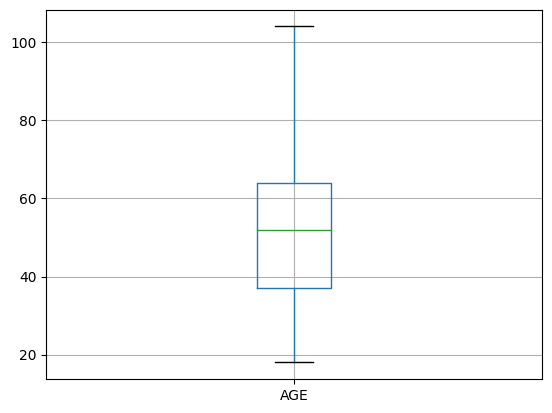

In [ ]:
syndemics_data.boxplot(column=["AGE"], return_type='axes')
plt.show()

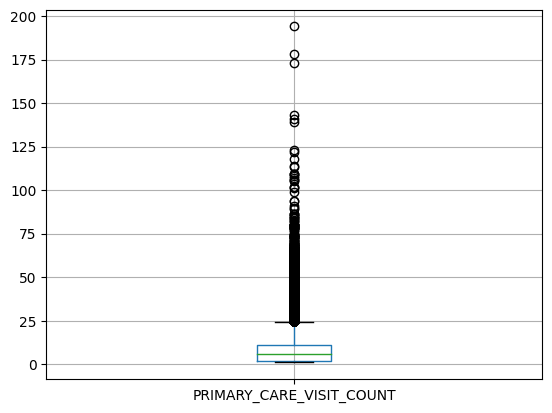

In [ ]:
syndemics_data.boxplot(column=["PRIMARY_CARE_VISIT_COUNT"], return_type='axes')
plt.show()

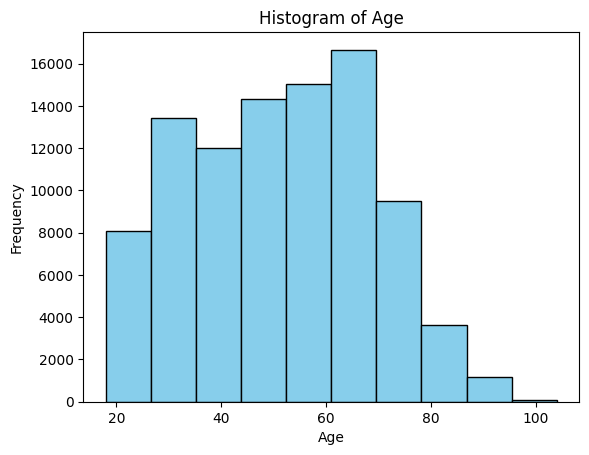

In [ ]:
plt.hist(syndemics_data["AGE"], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

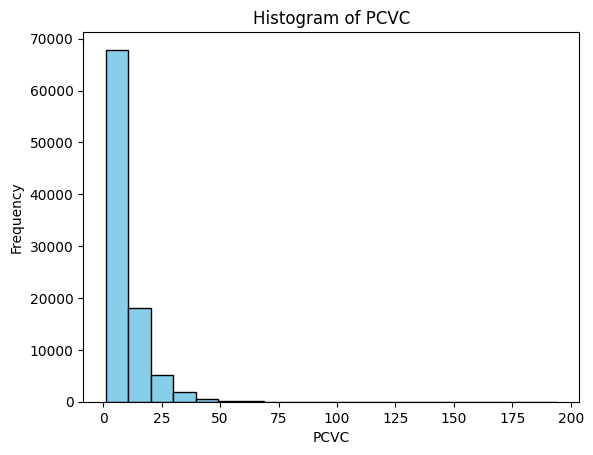

In [ ]:
plt.hist(syndemics_data["PRIMARY_CARE_VISIT_COUNT"], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of PCVC')
plt.xlabel('PCVC')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Primary care visit count outliers using zscore
# Total is 5,037/93995
# Calculate the quartiles
Q1 = syndemics_data['PRIMARY_CARE_VISIT_COUNT'].quantile(0.25)
Q3 = syndemics_data['PRIMARY_CARE_VISIT_COUNT'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1
# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the outliers
no_outliers = syndemics_data[(syndemics_data['PRIMARY_CARE_VISIT_COUNT'] >= lower_bound) & (syndemics_data['PRIMARY_CARE_VISIT_COUNT'] <= upper_bound)]
no_outliers.shape

(88958, 37)

In [ ]:
# Descriptive statistics of data after outlier removal
no_outliers["PRIMARY_CARE_VISIT_COUNT"].describe()

count   88958.00
mean        6.94
std         5.72
min         1.00
25%         2.00
50%         5.00
75%        10.00
max        24.00
Name: PRIMARY_CARE_VISIT_COUNT, dtype: float64

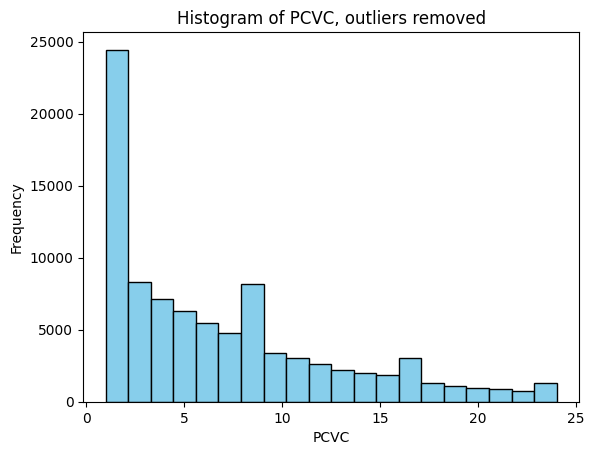

In [ ]:
# PCVC with no outliers distribution
plt.hist(no_outliers["PRIMARY_CARE_VISIT_COUNT"], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of PCVC, outliers removed')
plt.xlabel('PCVC')
plt.ylabel('Frequency')
plt.show()

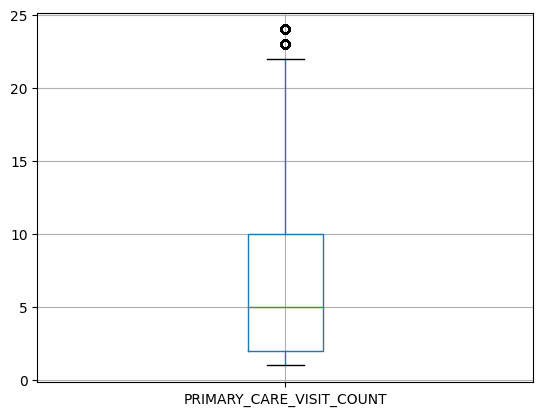

In [ ]:
# PCVC with no outliers box plot
no_outliers.boxplot(column=["PRIMARY_CARE_VISIT_COUNT"], return_type='axes')
plt.show()

In [ ]:
# Count for all diseases across patients
sums = no_outliers.sum(axis=0, numeric_only=True)
sums.sort_values(ascending=False)

PAT_ID                                                     4180054827
AGE                                                           4512914
PRIMARY_CARE_VISIT_COUNT                                       617757
Insurance                                                       55047
Hypertension                                                    40847
Hyperlipidemia                                                  39618
Depression, Bipolar, or Other Depressive Mood Disorders         21493
Diabetes                                                        16027
Anemia                                                          14882
Rheumatoid Arthritis/Osteoarthritis                             13652
Asthma                                                          10542
Hypothyroidism                                                   9593
Chronic Kidney Disease                                           7008
Ischemic Heart Disease                                           5600
Chronic Obstructive 

In [ ]:
percentages = (no_outliers.sum(axis=0, numeric_only=True) / len(no_outliers)) * 100
# Sort the percentages in descending order
percentages_sorted = percentages.sort_values(ascending=False)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Display the sorted percentages
print(percentages_sorted)

PAT_ID                                                    4698908.28
AGE                                                          5073.08
PRIMARY_CARE_VISIT_COUNT                                      694.44
Insurance                                                      61.88
Hypertension                                                   45.92
Hyperlipidemia                                                 44.54
Depression, Bipolar, or Other Depressive Mood Disorders        24.16
Diabetes                                                       18.02
Anemia                                                         16.73
Rheumatoid Arthritis/Osteoarthritis                            15.35
Asthma                                                         11.85
Hypothyroidism                                                 10.78
Chronic Kidney Disease                                          7.88
Ischemic Heart Disease                                          6.30
Chronic Obstructive Pulmonary Dise

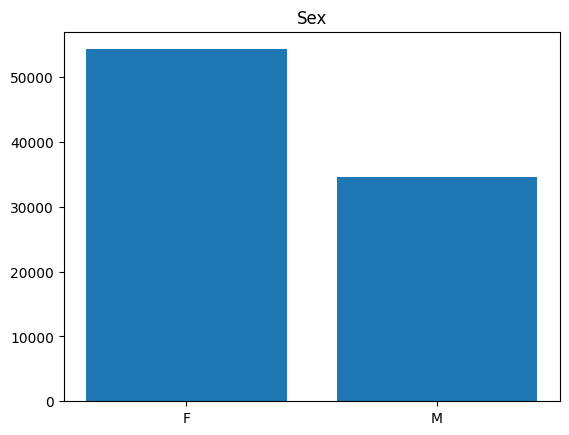

In [ ]:
# Look at classes for SEX variable
plt.bar(no_outliers["SEX"].value_counts().index, no_outliers["SEX"].value_counts())
plt.title('Sex')
plt.show()

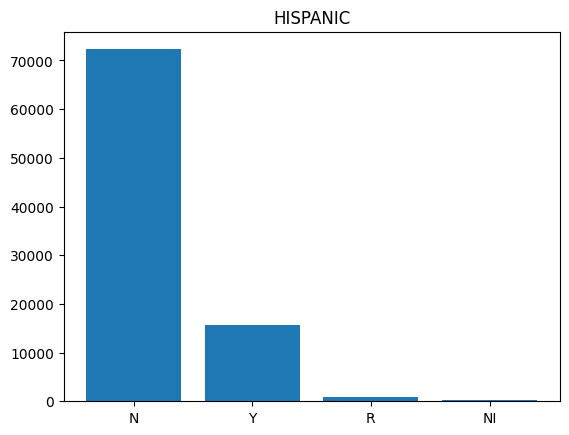

In [ ]:
# Look at classes for HISPANIC variable
plt.bar(no_outliers["HISPANIC"].value_counts().index, no_outliers["HISPANIC"].value_counts())
plt.title('HISPANIC')
plt.show()

In [ ]:
# Check missing values
syndemics_data.isnull().sum()

PAT_ID                                                     0
AGE                                                        0
SEX                                                        1
RACE                                                       0
HISPANIC                                                   0
PRIMARY_CARE_VISIT_COUNT                                   0
Acute Myocardial Infarction                                0
Alzheimer’s Disease                                        0
Anemia                                                     0
Asthma                                                     0
Atrial Fibrillation and Flutter                            0
Benign Prostatic Hyperplasia                               0
Cancer, Breast                                             0
Cancer, Colorectal                                         0
Cancer, Endometrial                                        0
Cancer, Lung                                               0
Cancer, Prostate        

In [ ]:
# Examine the records w/ missing values
syndemics_data[syndemics_data.isnull().any(axis=1)]

,PAT_ID,AGE,SEX,RACE,HISPANIC,PRIMARY_CARE_VISIT_COUNT,Acute Myocardial Infarction,Alzheimer’s Disease,Anemia,Asthma,...,Hypertension,Hypothyroidism,Ischemic Heart Disease,Non-Alzheimer’s Dementia,Osteoporosis With or Without Pathological Fracture,Parkinson’s Disease and Secondary Parkinsonism,"Pneumonia, All-cause",Rheumatoid Arthritis/Osteoarthritis,Stroke/Transient Ischemic Attack,Insurance
52285,52286,25,NaN,5,N,2,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


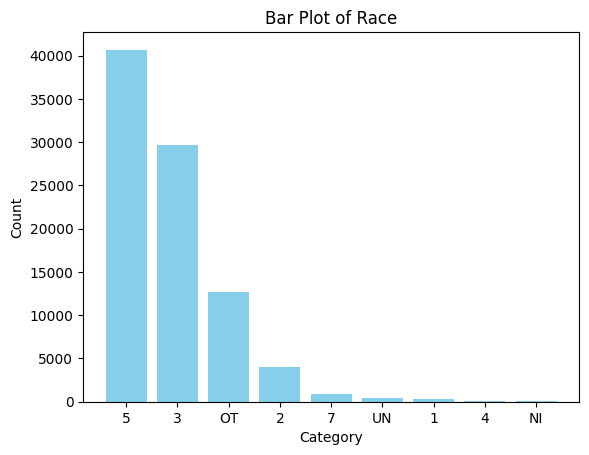

In [ ]:
# Look at classes for RACE variable
category_counts = no_outliers["RACE"].value_counts()
categories = category_counts.index
counts = category_counts.values

plt.bar(categories, counts, color='skyblue')
plt.title('Bar Plot of Race')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [ ]:
# Combine the classes 1,4,7, UN, NI, and OT into an NA variable
race_classes = ["1","4","7", "NI", "UN", "OT"]
new_race_category = "0"
syndemics_data['race_comb'] = syndemics_data['RACE'].apply(lambda x: new_race_category if x in race_classes else x)
# Drop the original 'race' column
syndemics_data.drop('RACE', axis=1, inplace=True)

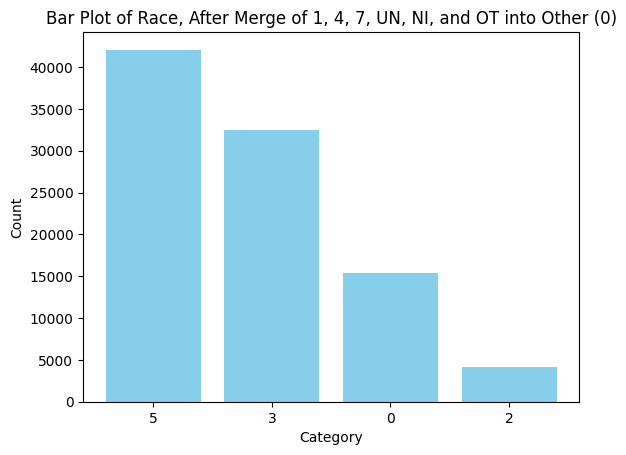

In [ ]:
# Look at classes for RACE variable, after merge
category_counts = syndemics_data["race_comb"].value_counts()
categories = category_counts.index
counts = category_counts.values

plt.bar(categories, counts, color='skyblue')
plt.title('Bar Plot of Race, After Merge of 1, 4, 7, UN, NI, and OT into Other (0)')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [ ]:
# Mapping race to actual races
race_mapping = {
    '0': 'OT',
    '2': 'Asian',
    '3': 'Black or African American',
    '5': 'White'
}

# Convert encoded values to actual race names
syndemics_data['race_comb'] = syndemics_data['race_comb'].map(race_mapping)

In [ ]:
# Mapping ethnicity
ethnicity_mapping = {
    'N': 'Not Hispanic',
    'Y': 'Hispanic',
    'R': 'Refuse to Answer',
    'NI': 'No Information'
}

# Convert encoded values to actual ethnicity names
syndemics_data['ethnicity'] = syndemics_data['HISPANIC'].map(ethnicity_mapping)

In [ ]:
# Race ethnicity combination
syndemics_data['race_ethnicity'] = syndemics_data['race_comb'].fillna('') + ', ' + syndemics_data['ethnicity'].fillna('')

In [ ]:
syndemics_data.head(10)

,PAT_ID,AGE,SEX,HISPANIC,PRIMARY_CARE_VISIT_COUNT,Acute Myocardial Infarction,Alzheimer’s Disease,Anemia,Asthma,Atrial Fibrillation and Flutter,...,Non-Alzheimer’s Dementia,Osteoporosis With or Without Pathological Fracture,Parkinson’s Disease and Secondary Parkinsonism,"Pneumonia, All-cause",Rheumatoid Arthritis/Osteoarthritis,Stroke/Transient Ischemic Attack,Insurance,race_comb,ethnicity,race_ethnicity
0,1,35,F,N,18,0,0,1,0,0,...,0,0,0,0,0,0,0,White,Not Hispanic,"White, Not Hispanic"
1,2,76,F,N,7,0,0,0,0,1,...,0,0,0,0,0,0,0,White,Not Hispanic,"White, Not Hispanic"
2,3,55,M,Y,1,0,0,0,0,0,...,0,0,0,1,0,0,0,White,Hispanic,"White, Hispanic"
3,4,27,M,N,1,0,0,0,1,0,...,0,0,0,0,0,0,0,Asian,Not Hispanic,"Asian, Not Hispanic"
4,5,69,F,N,1,0,0,0,0,0,...,0,0,0,0,1,0,1,White,Not Hispanic,"White, Not Hispanic"
5,6,49,M,N,2,0,0,0,0,0,...,0,0,0,0,0,0,0,Black or African American,Not Hispanic,"Black or African American, Not Hispanic"
6,7,52,M,N,1,0,0,0,0,0,...,0,0,0,0,0,0,0,Asian,Not Hispanic,"Asian, Not Hispanic"
7,8,32,M,N,14,0,0,0,0,0,...,0,0,0,0,0,0,1,White,Not Hispanic,"White, Not Hispanic"
8,9,57,F,N,3,0,0,0,0,0,...,0,1,0,0,1,0,0,Asian,Not Hispanic,"Asian, Not Hispanic"
9,10,73,M,N,4,0,0,0,0,0,...,0,0,0,0,0,0,0,White,Not Hispanic,"White, Not Hispanic"


In [ ]:
# Drop previous columns
syndemics_data = syndemics_data.drop(columns=['race_comb', 'ethnicity'])

In [ ]:
# Discretize Age variable
# Define the age bins and labels
bins = [18, 24, 44, 64, 74, 105]  # Specify the bin edges
labels = ['18-24', '25-44', '45-64', '65-74', '75-104']  # Specify labels for each bin

syndemics_data['age_bin'] = pd.cut(syndemics_data['AGE'], bins=bins, labels=labels, right=False)
# Drop the original 'AGE' column
syndemics_data.drop('AGE', axis=1, inplace=True)
syndemics_data.head(10)

,PAT_ID,SEX,HISPANIC,PRIMARY_CARE_VISIT_COUNT,Acute Myocardial Infarction,Alzheimer’s Disease,Anemia,Asthma,Atrial Fibrillation and Flutter,Benign Prostatic Hyperplasia,...,Ischemic Heart Disease,Non-Alzheimer’s Dementia,Osteoporosis With or Without Pathological Fracture,Parkinson’s Disease and Secondary Parkinsonism,"Pneumonia, All-cause",Rheumatoid Arthritis/Osteoarthritis,Stroke/Transient Ischemic Attack,Insurance,race_ethnicity,age_bin
0,1,F,N,18,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,"White, Not Hispanic",25-44
1,2,F,N,7,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,"White, Not Hispanic",75-104
2,3,M,Y,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,"White, Hispanic",45-64
3,4,M,N,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,"Asian, Not Hispanic",25-44
4,5,F,N,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,"White, Not Hispanic",65-74
5,6,M,N,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"Black or African American, Not Hispanic",45-64
6,7,M,N,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"Asian, Not Hispanic",45-64
7,8,M,N,14,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,"White, Not Hispanic",25-44
8,9,F,N,3,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,"Asian, Not Hispanic",45-64
9,10,M,N,4,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,"White, Not Hispanic",65-74


In [ ]:
# Discretize PCVC variable
# Define the bins and labels
bins = [1, 4, 8, 12, 16, 20, 24, 194]  # Specify the bin edges
labels = ['1-4','5-8','9-12','13-16','17-20','21-24','25+']  # Specify labels for each bin

syndemics_data['pcvc_bin'] = pd.cut(syndemics_data['PRIMARY_CARE_VISIT_COUNT'], bins=bins, labels=labels, right=False)
# Drop the original 'PCVC' column
syndemics_data.drop('PRIMARY_CARE_VISIT_COUNT', axis=1, inplace=True)
syndemics_data.head(10)

,PAT_ID,SEX,HISPANIC,Acute Myocardial Infarction,Alzheimer’s Disease,Anemia,Asthma,Atrial Fibrillation and Flutter,Benign Prostatic Hyperplasia,"Cancer, Breast",...,Non-Alzheimer’s Dementia,Osteoporosis With or Without Pathological Fracture,Parkinson’s Disease and Secondary Parkinsonism,"Pneumonia, All-cause",Rheumatoid Arthritis/Osteoarthritis,Stroke/Transient Ischemic Attack,Insurance,race_ethnicity,age_bin,pcvc_bin
0,1,F,N,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,"White, Not Hispanic",25-44,17-20
1,2,F,N,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,"White, Not Hispanic",75-104,5-8
2,3,M,Y,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,"White, Hispanic",45-64,1-4
3,4,M,N,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,"Asian, Not Hispanic",25-44,1-4
4,5,F,N,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,"White, Not Hispanic",65-74,1-4
5,6,M,N,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,"Black or African American, Not Hispanic",45-64,1-4
6,7,M,N,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,"Asian, Not Hispanic",45-64,1-4
7,8,M,N,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,"White, Not Hispanic",25-44,13-16
8,9,F,N,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,"Asian, Not Hispanic",45-64,1-4
9,10,M,N,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,"White, Not Hispanic",65-74,5-8


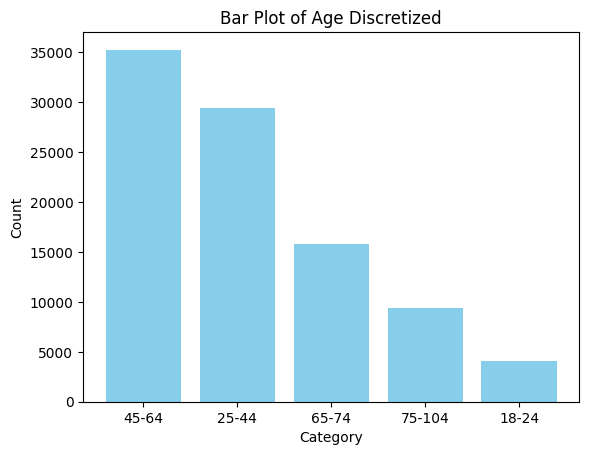

In [ ]:
# Look at classes for age variable
category_counts = syndemics_data['age_bin'].value_counts()
categories = category_counts.index
counts = category_counts.values

plt.bar(categories, counts, color='skyblue')
plt.title('Bar Plot of Age Discretized')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

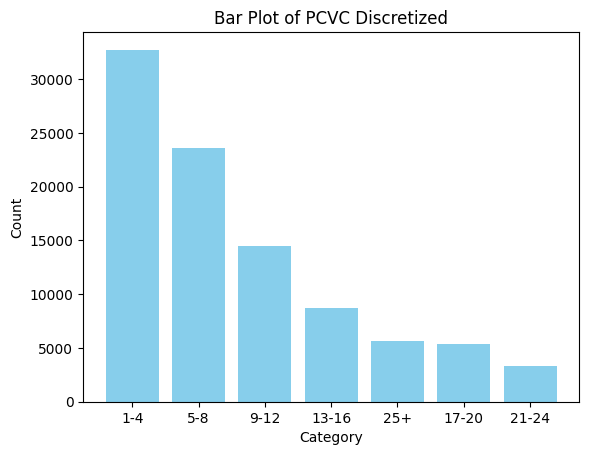

In [ ]:
# Look at classes for pcvc_bin variable
category_counts = syndemics_data['pcvc_bin'].value_counts()
categories = category_counts.index
counts = category_counts.values

plt.bar(categories, counts, color='skyblue')
plt.title('Bar Plot of PCVC Discretized')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [ ]:
# Drop N/A patients, generate dummy variables, prep for FA
syndemics_data_clean = syndemics_data.drop(syndemics_data[syndemics_data['SEX'].isnull()].index, axis=0)
# Drop ID, not relevant for Analysis
syndemics_data_clean = syndemics_data_clean.drop(["PAT_ID"], axis=1)
syndemics_data_clean = pd.get_dummies(syndemics_data_clean)
print(syndemics_data_clean.shape)
syndemics_data_clean.dtypes

(93994, 65)


Acute Myocardial Infarction        int64
Alzheimer’s Disease                int64
Anemia                             int64
Asthma                             int64
Atrial Fibrillation and Flutter    int64
                                   ...  
pcvc_bin_9-12                       bool
pcvc_bin_13-16                      bool
pcvc_bin_17-20                      bool
pcvc_bin_21-24                      bool
pcvc_bin_25+                        bool
Length: 65, dtype: object

In [ ]:
# Exclude non-diseases
# columns_to_exclude = ['AGE', 'SEX', 'HISPANIC', 'PRIMARY_CARE_VISIT_COUNT', 'Insurance', 'race_comb']
# Exclude columns and save as new DataFrame
# syndemics_data_clean = syndemics_data_clean.drop(columns=columns_to_exclude)
# Display the new DataFrame
# syndemics_data_clean

In [ ]:
# Encode the Sex and Hispanic variables if needed before saving to csv
# syndemics_data_clean['SEX'] = syndemics_data_clean['SEX'].replace({'M': 0, 'F': 1})
# syndemics_data_clean['HISPANIC'] = syndemics_data_clean['HISPANIC'].replace({'N': 0, 'Y': 1, 'R': 2, 'NI': 2})

In [ ]:
# Save data to csv file
path_allData_allFeatures='/content/drive/MyDrive/ColabNotebooks/SyndemicProject/'
syndemics_data_clean.to_csv(path_allData_allFeatures+"all_data_all_features_dummy.csv", encoding='utf-8', index=False)

## Correlations and other exploratory analyses

In [ ]:
# Look at correlations of variables
# Demographic vars: "SEX_F", "SEX_M", "HISPANIC_N", "HISPANIC_NI", "HISPANIC_R", "HISPANIC_Y", "race_comb_2", "race_comb_3",
# "race_comb_5", "race_comb_Other", "age_bin_18-24", "age_bin_24-44", "age_bin_44-64", "age_bin_64-74",
# "age_bin_74-104",  "pcvc_bin_1-4",    "pcvc_bin_4-8",    "pcvc_bin_8-12",   "pcvc_bin_12-16",  "pcvc_bin_16-20",  "pcvc_bin_20-24"

yuleq = lambda a, b: binary_binary(a, b, measure='yule_q')
yuleq_corr = corr(syndemics_data_clean, yuleq)

KeyboardInterrupt: 

In [ ]:
# Generate a correlation matrix variables
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(yuleq_corr))

heatmap = sns.heatmap(yuleq_corr, vmin =-1, vmax=1, cmap="coolwarm", mask=mask)
# annot=True
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

In [ ]:
# filtered_corr_matrix = yuleq_corr[yuleq_corr >= 0.6]
# np.fill_diagonal(filtered_corr_matrix.values, np.nan)

# # Visualize the filtered correlation matrix using a heatmap
# plt.figure(figsize=(20, 8))
# sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix (Above Threshold {})'.format(0.6))
# plt.show()

In [ ]:
row_indices_of_interest = [i for i in range(30)]
column_indices_of_interest = [i for i in range(52)]

# Create a list of variable names based on the indices
row_variables_of_interest = yuleq_corr.columns[row_indices_of_interest]
column_variables_of_interest = yuleq_corr.columns[column_indices_of_interest]

# Create a new DataFrame to store correlations >= 0.6
high_corr_table = pd.DataFrame(index=row_variables_of_interest, columns=column_variables_of_interest)

# Populate the new DataFrame with correlations >= 0.6
for i in row_variables_of_interest:
    for j in column_variables_of_interest:
        if i != j:  # Skip if the variable is the same
            correlation = yuleq_corr.loc[i,j]
            if correlation >= 0.6:
                high_corr_table.loc[i, j] = correlation
            else:
                high_corr_table.loc[i, j] = 0
# Function to count values greater than 0.6 in each row
def count_values(row):
    return (row >= 0.6).sum()
high_corr_table['count'] = high_corr_table.apply(count_values, axis=1)

# Create a new dataframe with counts of values greater than 0.6
counts_columns = pd.DataFrame(high_corr_table.apply(count_values, axis=0)).T
counts_columns.index = ["count"]
combined_df = pd.concat([high_corr_table, counts_columns], axis=0)

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
combined_df

In [ ]:
# high_corr_table.to_excel('high_corr_table.xlsx', index=True)

In [ ]:
yuleq_corr[['Acute Myocardial Infarction']].sort_values(by='Acute Myocardial Infarction', ascending=False)
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(yuleq_corr[['Acute Myocardial Infarction']].sort_values(by='Acute Myocardial Infarction', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Acute Myocardial Infarction', fontdict={'fontsize':18}, pad=16)
plt.show()

In [ ]:
yuleq_corr[['Alzheimer’s Disease']].sort_values(by='Alzheimer’s Disease', ascending=False)
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(yuleq_corr[['Alzheimer’s Disease']].sort_values(by='Alzheimer’s Disease', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Alzheimer’s Disease', fontdict={'fontsize':18}, pad=16)
plt.show()

In [ ]:
yuleq_corr[['Atrial Fibrillation and Flutter']].sort_values(by='Atrial Fibrillation and Flutter', ascending=False)
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(yuleq_corr[['Atrial Fibrillation and Flutter']].sort_values(by='Atrial Fibrillation and Flutter', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Atrial Fibrillation and Flutter', fontdict={'fontsize':18}, pad=16)
plt.show()

In [ ]:
yuleq_corr[['Cancer, Prostate']].sort_values(by='Cancer, Prostate', ascending=False)
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(yuleq_corr[['Cancer, Prostate']].sort_values(by='Cancer, Prostate', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Cancer, Prostate', fontdict={'fontsize':18}, pad=16)
plt.show()

In [ ]:
yuleq_corr[['Chronic Kidney Disease']].sort_values(by='Chronic Kidney Disease', ascending=False)
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(yuleq_corr[['Chronic Kidney Disease']].sort_values(by='Chronic Kidney Disease', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Chronic Kidney Disease', fontdict={'fontsize':18}, pad=16)
plt.show()

In [ ]:
yuleq_corr[['Heart Failure and Non-Ischemic Heart Disease']].sort_values(by='Heart Failure and Non-Ischemic Heart Disease', ascending=False)
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(yuleq_corr[['Heart Failure and Non-Ischemic Heart Disease']].sort_values(by='Heart Failure and Non-Ischemic Heart Disease', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Heart Failure and Non-Ischemic Heart Disease', fontdict={'fontsize':18}, pad=16)
plt.show()

In [ ]:
yuleq_corr[['Hip/Pelvic Fracture']].sort_values(by='Hip/Pelvic Fracture', ascending=False)
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(yuleq_corr[['Hip/Pelvic Fracture']].sort_values(by='Hip/Pelvic Fracture', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Hip/Pelvic Fracture', fontdict={'fontsize':18}, pad=16)
plt.show()

In [ ]:
yuleq_corr[["Hypertension"]].sort_values(by="Hypertension", ascending=False)
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(yuleq_corr[["Hypertension"]].sort_values(by="Hypertension", ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Hypertension', fontdict={'fontsize':18}, pad=16)
plt.show()

In [ ]:
yuleq_corr[["Ischemic Heart Disease"]].sort_values(by="Ischemic Heart Disease", ascending=False)
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(yuleq_corr[["Ischemic Heart Disease"]].sort_values(by="Ischemic Heart Disease", ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Ischemic Heart Disease', fontdict={'fontsize':18}, pad=16)
plt.show()

In [ ]:
yuleq_corr[["Non-Alzheimer’s Dementia"]].sort_values(by="Non-Alzheimer’s Dementia", ascending=False)
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(yuleq_corr[["Non-Alzheimer’s Dementia"]].sort_values(by="Non-Alzheimer’s Dementia", ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Non-Alzheimer’s Dementia', fontdict={'fontsize':18}, pad=16)
plt.show()

In [ ]:
yuleq_corr[["Osteoporosis With or Without Pathological Fracture"]].sort_values(by="Osteoporosis With or Without Pathological Fracture", ascending=False)
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(yuleq_corr[["Osteoporosis With or Without Pathological Fracture"]].sort_values(by="Osteoporosis With or Without Pathological Fracture", ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Osteoporosis With or Without Pathological Fracture', fontdict={'fontsize':18}, pad=16)
plt.show()

In [ ]:
yuleq_corr[["Parkinson’s Disease and Secondary Parkinsonism"]].sort_values(by="Parkinson’s Disease and Secondary Parkinsonism", ascending=False)
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(yuleq_corr[["Parkinson’s Disease and Secondary Parkinsonism"]].sort_values(by="Parkinson’s Disease and Secondary Parkinsonism", ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Parkinson’s Disease and Secondary Parkinsonism', fontdict={'fontsize':18}, pad=16)
plt.show()

In [ ]:
# Examine scree plot for adequate number of factors
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors=25, rotation="varimax")
fa.fit(syndemics_data_clean)

factor_variance = fa.get_factor_variance()

# # Check Eigenvalues
ev, v = fa.get_eigenvalues()

In [ ]:
# Create scree plot using matplotlib
plt.scatter(range(1,syndemics_data_clean.shape[1]+1),ev)
plt.plot(range(1,syndemics_data_clean.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

## Factor analysis

In [ ]:
# Create factor analysis object and perform factor analysis
# fa_final.get_factor_variance()
fa_final = FactorAnalyzer(n_factors=10, rotation="varimax")
fa_final.fit(syndemics_data_clean)
# factor_variance_final = fa_final.get_factor_variance()

factor_loading_df = pd.DataFrame(fa_final.loadings_,
                                 columns=['Factor1', 'Factor2', 'Factor3',
                                         'Factor4','Factor5', 'Factor6',
                                         'Factor7','Factor8', 'Factor9',
                                         'Factor10'], index=[syndemics_data_clean.columns])
factor_loading_df

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10
Acute Myocardial Infarction,0.01,0.13,-0.02,-0.00,-0.00,0.01,0.01,0.01,-0.01,0.00
Alzheimer’s Disease,-0.00,0.07,0.01,-0.01,-0.00,0.01,0.00,0.00,0.71,0.01
Anemia,0.00,0.18,0.11,-0.01,-0.01,0.19,-0.07,0.01,0.02,0.10
Asthma,-0.00,-0.12,0.05,-0.01,0.00,0.08,-0.10,-0.02,-0.02,0.08
Atrial Fibrillation and Flutter,-0.02,0.32,-0.02,-0.00,-0.00,-0.04,-0.03,0.01,0.03,-0.03
...,...,...,...,...,...,...,...,...,...,...
pcvc_bin_9-12,-0.01,-0.02,-0.02,-0.01,-0.01,-0.03,0.00,-0.08,0.01,0.32
pcvc_bin_13-16,0.01,0.08,0.02,-0.01,-0.01,0.01,0.02,-0.04,0.01,0.19
pcvc_bin_17-20,0.01,0.13,0.03,-0.00,-0.01,0.03,0.02,-0.03,-0.00,0.14
pcvc_bin_21-24,0.02,0.14,0.03,0.00,-0.00,0.04,0.02,-0.02,0.01,0.10


In [ ]:
# Sorting based on loading weights for 'Factor1'
factor_loading_df_sorted_f1 = factor_loading_df.sort_values(by=factor_loading_df.columns[0], axis=0, ascending=False, key=abs)
factor_loading_df_sorted_f1

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10
HISPANIC_N,-0.98,0.00,0.03,0.11,0.01,-0.02,-0.00,0.04,-0.08,0.04
HISPANIC_Y,0.89,-0.01,-0.02,-0.11,-0.01,0.02,0.01,-0.05,0.11,-0.05
race_comb_Other,0.76,-0.02,-0.04,0.06,-0.02,0.02,0.00,-0.01,0.00,-0.01
race_comb_5,-0.31,0.01,-0.05,-0.95,0.01,-0.01,-0.01,0.01,-0.04,0.01
race_comb_3,-0.30,0.03,0.12,0.76,0.05,-0.02,0.01,-0.01,0.09,-0.03
HISPANIC_R,0.14,0.00,-0.02,0.02,0.00,0.00,-0.01,0.01,-0.05,0.02
Diabetes,0.09,-0.02,0.28,0.13,0.10,-0.00,-0.00,0.04,0.09,0.14
HISPANIC_NI,0.06,-0.01,-0.02,0.01,0.00,-0.03,-0.00,0.00,-0.05,-0.00
pcvc_bin_1-4,0.06,-0.04,-0.13,0.00,0.01,-0.59,-0.02,0.03,-0.82,0.00
race_comb_2,-0.05,-0.02,-0.05,0.05,-0.07,0.02,-0.01,-0.00,-0.08,0.03


In [ ]:
# Sorting based on loading weights for 'Factor2'
factor_loading_df_sorted_f2 = factor_loading_df.sort_values(by=factor_loading_df.columns[1], axis=0, ascending=False, key=abs)
factor_loading_df_sorted_f2

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10
SEX_F,-0.02,0.98,-0.11,0.09,-0.06,-0.00,-0.00,-0.04,0.07,-0.11
SEX_M,0.02,-0.98,0.11,-0.09,0.06,0.00,0.00,0.04,-0.07,0.11
Benign Prostatic Hyperplasia,-0.01,-0.24,0.19,-0.07,0.06,0.01,0.03,0.10,0.06,0.03
Osteoporosis With or Without Pathological Fracture,-0.01,0.20,0.19,-0.10,0.01,0.01,0.05,0.10,0.06,0.00
Hypothyroidism,0.01,0.17,0.06,-0.12,0.01,0.01,0.01,0.01,0.01,0.04
"Cancer, Breast",-0.03,0.15,0.05,-0.00,0.05,0.01,0.00,0.04,0.04,0.03
"Cancer, Prostate",-0.02,-0.14,0.14,-0.00,0.02,0.00,0.02,0.06,0.01,0.01
Anemia,-0.01,0.11,0.16,0.16,-0.07,0.01,0.01,-0.04,0.12,-0.04
Rheumatoid Arthritis/Osteoarthritis,-0.04,0.10,0.19,-0.03,0.12,-0.05,0.02,0.11,0.09,0.06
age_bin_74-104,-0.03,0.09,0.59,-0.08,-0.07,0.00,0.20,-0.16,-0.12,-0.06


In [ ]:
# Sorting based on loading weights for 'Factor3'
factor_loading_df_sorted_f3 = factor_loading_df.sort_values(by=factor_loading_df.columns[2], axis=0, ascending=False, key=abs)
factor_loading_df_sorted_f3

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10
age_bin_74-104,-0.03,0.09,0.59,-0.08,-0.07,0.00,0.20,-0.16,-0.12,-0.06
Hypertension,-0.05,-0.00,0.42,0.15,0.19,0.01,0.02,0.11,0.12,0.23
age_bin_24-44,0.04,-0.08,-0.40,0.02,-0.86,-0.00,-0.05,-0.26,0.01,0.19
Chronic Kidney Disease,0.00,-0.03,0.40,0.10,0.00,0.00,0.00,-0.00,0.06,0.06
Heart Failure and Non-Ischemic Heart Disease,-0.01,-0.01,0.39,0.08,-0.01,0.00,-0.02,-0.05,0.02,0.02
Ischemic Heart Disease,-0.01,-0.06,0.38,-0.02,0.03,0.00,-0.00,0.04,0.05,0.06
Atrial Fibrillation and Flutter,-0.02,-0.02,0.34,-0.05,-0.01,0.00,0.01,-0.01,-0.00,0.00
Diabetes,0.09,-0.02,0.28,0.13,0.10,-0.00,-0.00,0.04,0.09,0.14
Hyperlipidemia,0.00,-0.06,0.22,-0.06,0.16,0.06,0.01,0.14,0.19,0.22
age_bin_44-64,-0.02,0.00,-0.19,0.06,0.86,-0.00,-0.07,-0.32,0.10,0.31


In [ ]:
# Sorting based on loading weights for 'Factor4'
factor_loading_df_sorted_f4 = factor_loading_df.sort_values(by=factor_loading_df.columns[3], axis=0, ascending=False, key=abs)
factor_loading_df_sorted_f4

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10
race_comb_5,-0.31,0.01,-0.05,-0.95,0.01,-0.01,-0.01,0.01,-0.04,0.01
race_comb_3,-0.30,0.03,0.12,0.76,0.05,-0.02,0.01,-0.01,0.09,-0.03
Anemia,-0.01,0.11,0.16,0.16,-0.07,0.01,0.01,-0.04,0.12,-0.04
Hypertension,-0.05,-0.00,0.42,0.15,0.19,0.01,0.02,0.11,0.12,0.23
Diabetes,0.09,-0.02,0.28,0.13,0.10,-0.00,-0.00,0.04,0.09,0.14
Hypothyroidism,0.01,0.17,0.06,-0.12,0.01,0.01,0.01,0.01,0.01,0.04
HISPANIC_Y,0.89,-0.01,-0.02,-0.11,-0.01,0.02,0.01,-0.05,0.11,-0.05
HISPANIC_N,-0.98,0.00,0.03,0.11,0.01,-0.02,-0.00,0.04,-0.08,0.04
Chronic Kidney Disease,0.00,-0.03,0.40,0.10,0.00,0.00,0.00,-0.00,0.06,0.06
Osteoporosis With or Without Pathological Fracture,-0.01,0.20,0.19,-0.10,0.01,0.01,0.05,0.10,0.06,0.00


In [ ]:
# Sorting based on loading weights for 'Factor5'
factor_loading_df_sorted_f5 = factor_loading_df.sort_values(by=factor_loading_df.columns[4], axis=0, ascending=False, key=abs)
factor_loading_df_sorted_f5

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10
age_bin_44-64,-0.02,0.00,-0.19,0.06,0.86,-0.00,-0.07,-0.32,0.10,0.31
age_bin_24-44,0.04,-0.08,-0.40,0.02,-0.86,-0.00,-0.05,-0.26,0.01,0.19
Hypertension,-0.05,-0.00,0.42,0.15,0.19,0.01,0.02,0.11,0.12,0.23
Hyperlipidemia,0.00,-0.06,0.22,-0.06,0.16,0.06,0.01,0.14,0.19,0.22
Rheumatoid Arthritis/Osteoarthritis,-0.04,0.10,0.19,-0.03,0.12,-0.05,0.02,0.11,0.09,0.06
"Depression, Bipolar, or Other Depressive Mood Disorders",0.01,0.07,-0.16,-0.08,-0.12,0.00,0.00,-0.08,0.12,-0.17
Diabetes,0.09,-0.02,0.28,0.13,0.10,-0.00,-0.00,0.04,0.09,0.14
Asthma,-0.02,0.02,-0.12,0.05,-0.08,-0.01,-0.02,-0.05,0.05,-0.15
race_comb_2,-0.05,-0.02,-0.05,0.05,-0.07,0.02,-0.01,-0.00,-0.08,0.03
Anemia,-0.01,0.11,0.16,0.16,-0.07,0.01,0.01,-0.04,0.12,-0.04


In [ ]:
# Sorting based on loading weights for 'Factor6'
factor_loading_df_sorted_f6 = factor_loading_df.sort_values(by=factor_loading_df.columns[5], axis=0, ascending=False, key=abs)
factor_loading_df_sorted_f6

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10
pcvc_bin_4-8,-0.01,0.00,-0.08,-0.00,-0.01,1.00,-0.00,-0.01,-0.20,0.02
pcvc_bin_1-4,0.06,-0.04,-0.13,0.00,0.01,-0.59,-0.02,0.03,-0.82,0.00
pcvc_bin_8-12,-0.03,-0.01,-0.01,-0.03,0.00,-0.10,0.01,-0.02,0.35,-0.02
Hyperlipidemia,0.00,-0.06,0.22,-0.06,0.16,0.06,0.01,0.14,0.19,0.22
pcvc_bin_12-16,-0.01,0.03,0.09,0.01,0.02,-0.06,0.01,0.00,0.23,0.02
Insurance,-0.02,0.06,0.05,0.07,0.01,0.06,-0.02,0.07,0.28,-0.01
Rheumatoid Arthritis/Osteoarthritis,-0.04,0.10,0.19,-0.03,0.12,-0.05,0.02,0.11,0.09,0.06
pcvc_bin_16-20,0.00,0.04,0.13,0.03,0.02,-0.04,0.00,0.03,0.18,0.02
pcvc_bin_20-24,0.01,0.05,0.15,0.05,0.02,-0.03,0.01,0.02,0.14,0.03
HISPANIC_NI,0.06,-0.01,-0.02,0.01,0.00,-0.03,-0.00,0.00,-0.05,-0.00


In [ ]:
# Sorting based on loading weights for 'Factor7'
factor_loading_df_sorted_f7 = factor_loading_df.sort_values(by=factor_loading_df.columns[6], axis=0, ascending=False, key=abs)
factor_loading_df_sorted_f7

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10
Non-Alzheimer’s Dementia,-0.00,0.02,0.11,0.02,-0.00,-0.00,0.87,-0.01,-0.00,0.02
Alzheimer’s Disease,-0.01,0.02,0.06,0.01,0.00,0.00,0.73,-0.00,0.01,0.02
age_bin_74-104,-0.03,0.09,0.59,-0.08,-0.07,0.00,0.20,-0.16,-0.12,-0.06
age_bin_44-64,-0.02,0.00,-0.19,0.06,0.86,-0.00,-0.07,-0.32,0.10,0.31
Parkinson’s Disease and Secondary Parkinsonism,0.00,-0.01,0.08,-0.04,0.00,-0.00,0.06,0.02,0.01,-0.01
Osteoporosis With or Without Pathological Fracture,-0.01,0.20,0.19,-0.10,0.01,0.01,0.05,0.10,0.06,0.00
age_bin_24-44,0.04,-0.08,-0.40,0.02,-0.86,-0.00,-0.05,-0.26,0.01,0.19
Benign Prostatic Hyperplasia,-0.01,-0.24,0.19,-0.07,0.06,0.01,0.03,0.10,0.06,0.03
Rheumatoid Arthritis/Osteoarthritis,-0.04,0.10,0.19,-0.03,0.12,-0.05,0.02,0.11,0.09,0.06
Stroke/Transient Ischemic Attack,-0.01,0.01,0.09,0.01,0.02,0.00,0.02,0.03,0.04,0.02


In [ ]:
# Sorting based on loading weights for 'Factor8'
factor_loading_df_sorted_f8 = factor_loading_df.sort_values(by=factor_loading_df.columns[7], axis=0, ascending=False, key=abs)
factor_loading_df_sorted_f8

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10
age_bin_64-74,-0.02,0.06,0.16,-0.04,-0.02,-0.02,-0.01,0.98,0.05,0.10
age_bin_44-64,-0.02,0.00,-0.19,0.06,0.86,-0.00,-0.07,-0.32,0.10,0.31
age_bin_24-44,0.04,-0.08,-0.40,0.02,-0.86,-0.00,-0.05,-0.26,0.01,0.19
age_bin_74-104,-0.03,0.09,0.59,-0.08,-0.07,0.00,0.20,-0.16,-0.12,-0.06
Hyperlipidemia,0.00,-0.06,0.22,-0.06,0.16,0.06,0.01,0.14,0.19,0.22
Hypertension,-0.05,-0.00,0.42,0.15,0.19,0.01,0.02,0.11,0.12,0.23
Rheumatoid Arthritis/Osteoarthritis,-0.04,0.10,0.19,-0.03,0.12,-0.05,0.02,0.11,0.09,0.06
Osteoporosis With or Without Pathological Fracture,-0.01,0.20,0.19,-0.10,0.01,0.01,0.05,0.10,0.06,0.00
Benign Prostatic Hyperplasia,-0.01,-0.24,0.19,-0.07,0.06,0.01,0.03,0.10,0.06,0.03
Cataract,-0.02,0.05,0.18,-0.00,0.02,-0.01,0.01,0.09,0.10,0.02


In [ ]:
# Sorting based on loading weights for 'Factor9'
factor_loading_df_sorted_f9 = factor_loading_df.sort_values(by=factor_loading_df.columns[8], axis=0, ascending=False, key=abs)
factor_loading_df_sorted_f9

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10
pcvc_bin_1-4,0.06,-0.04,-0.13,0.00,0.01,-0.59,-0.02,0.03,-0.82,0.00
pcvc_bin_8-12,-0.03,-0.01,-0.01,-0.03,0.00,-0.10,0.01,-0.02,0.35,-0.02
Insurance,-0.02,0.06,0.05,0.07,0.01,0.06,-0.02,0.07,0.28,-0.01
pcvc_bin_12-16,-0.01,0.03,0.09,0.01,0.02,-0.06,0.01,0.00,0.23,0.02
pcvc_bin_4-8,-0.01,0.00,-0.08,-0.00,-0.01,1.00,-0.00,-0.01,-0.20,0.02
Hyperlipidemia,0.00,-0.06,0.22,-0.06,0.16,0.06,0.01,0.14,0.19,0.22
pcvc_bin_16-20,0.00,0.04,0.13,0.03,0.02,-0.04,0.00,0.03,0.18,0.02
pcvc_bin_20-24,0.01,0.05,0.15,0.05,0.02,-0.03,0.01,0.02,0.14,0.03
age_bin_74-104,-0.03,0.09,0.59,-0.08,-0.07,0.00,0.20,-0.16,-0.12,-0.06
"Depression, Bipolar, or Other Depressive Mood Disorders",0.01,0.07,-0.16,-0.08,-0.12,0.00,0.00,-0.08,0.12,-0.17


In [ ]:
# Sorting based on loading weights for 'Factor10'
factor_loading_df_sorted_f10 = factor_loading_df.sort_values(by=factor_loading_df.columns[9], axis=0, ascending=False, key=abs)
factor_loading_df_sorted_f10

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10
age_bin_18-24,0.03,-0.05,-0.10,0.03,0.06,0.01,-0.00,0.01,-0.03,-0.69
age_bin_44-64,-0.02,0.00,-0.19,0.06,0.86,-0.00,-0.07,-0.32,0.10,0.31
Hypertension,-0.05,-0.00,0.42,0.15,0.19,0.01,0.02,0.11,0.12,0.23
Hyperlipidemia,0.00,-0.06,0.22,-0.06,0.16,0.06,0.01,0.14,0.19,0.22
age_bin_24-44,0.04,-0.08,-0.40,0.02,-0.86,-0.00,-0.05,-0.26,0.01,0.19
"Depression, Bipolar, or Other Depressive Mood Disorders",0.01,0.07,-0.16,-0.08,-0.12,0.00,0.00,-0.08,0.12,-0.17
Asthma,-0.02,0.02,-0.12,0.05,-0.08,-0.01,-0.02,-0.05,0.05,-0.15
Diabetes,0.09,-0.02,0.28,0.13,0.10,-0.00,-0.00,0.04,0.09,0.14
SEX_M,0.02,-0.98,0.11,-0.09,0.06,0.00,0.00,0.04,-0.07,0.11
SEX_F,-0.02,0.98,-0.11,0.09,-0.06,-0.00,-0.00,-0.04,0.07,-0.11
